In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Import successful!')

Import successful!


In [2]:
# Sklearn library imports  
from sklearn.model_selection import train_test_split

print("sklearn modules imported!")

sklearn modules imported!


## Load training data for exploration  

In [3]:
train_df = pd.read_csv(r"./data/train.csv")
train_df.shape, train_df.head()

((162758, 5),
                                              movieid         reviewerName  \
 0                                   marvelous_pirate       Benjamin Henry   
 1          tony_montana_frodo_baggins_v_rocky_balboa        Felicia Lopez   
 2  darth_vader_katniss_everdeen_sorcerer_donnie_d...  Mr. Charles Burgess   
 3                                 lara_croft_glimmer         Ryan Barrett   
 4  jason_bourne_surreal_the_terminator_indiana_jones     Alexander Glover   
 
    isFrequentReviewer                                         reviewText  \
 0               False  Henry Selick’s first movie since 2009’s Corali...   
 1               False  With a cast that reads like the Vogue Oscar pa...   
 2                True  Creed II does not give us anything but another...   
 3               False  I know what you're thinking, but this is no Li...   
 4               False  Director Fernando Meirelles tells the story wi...   
 
   sentiment  
 0  POSITIVE  
 1  NEGATIVE  
 2  POS

In [4]:
train_df.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [5]:
train_df.dtypes

movieid               object
reviewerName          object
isFrequentReviewer      bool
reviewText            object
sentiment             object
dtype: object

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


`# Missing values`  

In [7]:
train_df.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [8]:
missing_reviews = train_df['reviewText'].isna().sum()
pct_missing_reviews = (missing_reviews / train_df.shape[0]) * 100
pct_missing_reviews

3.9610956143476814

`# Counts`  

In [9]:
train_df["reviewerName"].value_counts()

Sherri Morrison      962
Veronica Serrano     952
Mrs. Vickie Young    827
Kristy Ferguson      822
Heather Pena         797
                    ... 
Ashley Munoz           1
Ryan Dean              1
Joanna Li              1
Jason Carroll          1
Chad Mueller           1
Name: reviewerName, Length: 4482, dtype: int64

In [10]:
unique_reviewers = len(train_df["reviewerName"].unique())
unique_reviewers

4482

In [11]:
pct_unique_reviewers = (unique_reviewers / train_df.shape[0]) * 100
pct_unique_reviewers

2.7537816881505055

In [12]:
reviewers = train_df[['reviewerName', 'isFrequentReviewer']]
reviewers

,reviewerName,isFrequentReviewer
0,Benjamin Henry,False
1,Felicia Lopez,False
2,Mr. Charles Burgess,True
3,Ryan Barrett,False
4,Alexander Glover,False
...,...,...
162753,Danny Mueller,False
162754,Jennifer Clayton,True
162755,Bryan Wilson,False
162756,Erik Parker,False


In [13]:
reviewers.drop_duplicates(subset="reviewerName", inplace=True)
reviewers

c:\Users\All users\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,reviewerName,isFrequentReviewer
0,Benjamin Henry,False
1,Felicia Lopez,False
2,Mr. Charles Burgess,True
3,Ryan Barrett,False
4,Alexander Glover,False
...,...,...
161590,William Glass,False
161921,Lisa Lawrence,False
162282,Gina Boyer,True
162440,David Small,False


In [14]:
reviewers["isFrequentReviewer"].value_counts()

False    3311
True     1171
Name: isFrequentReviewer, dtype: int64

In [15]:
pct_freq_reviewers = (reviewers["isFrequentReviewer"].value_counts() / reviewers.shape[0]) * 100
pct_freq_reviewers

False    73.873271
True     26.126729
Name: isFrequentReviewer, dtype: float64

## Movie id  


In [16]:
train_df.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [17]:
train_df['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish    708
fantasy_forrest_gump_intrigue                  245
james_t._kirk_marty_mcfly_astonish             186
marvelous_lara_croft_luke_skywalker            140
michael_corleone_v_marty_mcfly_tony_stark      138
                                              ... 
james_bond_legend_marty_mcfly_elegant            1
myriad_aurora_edward_scissorhands                1
mystic_ferris_bueller_spectacular                1
crimson_velvet                                   1
forrest_gump_fantasy_epic                        1
Name: movieid, Length: 16812, dtype: int64

In [18]:
len(np.unique(train_df['movieid']))

16812

`# Sentiment`  

In [19]:
train_df["sentiment"].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

In [20]:
sentiment_types = (train_df["sentiment"].value_counts() / train_df.shape[0]) * 100
sentiment_types

POSITIVE    66.823751
NEGATIVE    33.176249
Name: sentiment, dtype: float64

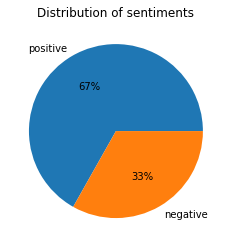

In [21]:
plt.pie(train_df["sentiment"].value_counts(), labels=["positive", "negative"], autopct='%.0f%%')
plt.title("Distribution of sentiments")
plt.show()

## Peek at the test data  

In [22]:
test_df = pd.read_csv(r"./data/test.csv")
test_df.shape, test_df.head()

((55315, 4),
                                movieid     reviewerName  isTopCritic  \
 0            legend_marty_mcfly_oracle         John Kim        False   
 1  terminator_katniss_everdeen_glimmer     Brian Chaney        False   
 2          james_bond_labyrinth_gollum  Danielle Parker        False   
 3            v_quest_han_solo_wondrous    Brittany Lane        False   
 4        enigma_hulk_surreal_starlight    Justin Willis        False   
 
                                           reviewText  
 0  Green slowly cranks up the dread with style an...  
 1  Philip Noyce's direction is elegant and unforc...  
 2  It wouldn't do to say what path Maria ultimate...  
 3  Pig is not exactly the arthouse John Wick that...  
 4  An imaginative no-budget musical of sorts abou...  )

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


In [24]:
test_df.isna().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [28]:
pct_missing_reviews_text = (test_df["reviewText"].isna().sum() / test_df.shape[0]) * 100
pct_missing_reviews_text

4.537648015908886

In [29]:
train_df.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [30]:
test_df.columns

Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText'], dtype='object')

## Check correlation between some columns and sentiment  

In [31]:
train_df.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [33]:
train_df.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [39]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(train_df["isFrequentReviewer"], train_df["sentiment"])
crosstab

sentiment,NEGATIVE,POSITIVE
isFrequentReviewer,,
False,35760,77429
True,18237,31332


In [40]:
chi2_contingency(crosstab)

(419.89235425657796,
 2.5755894769493255e-93,
 1,
 array([[37551.86493444, 75637.13506556],
        [16445.13506556, 33123.86493444]]))

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [59]:
xtr, xts, ytr, yts = train_test_split(train_df["isFrequentReviewer"], train_df["sentiment"], test_size=0.25, random_state=42)
xtr.shape, xts.shape, ytr.shape, yts.shape

((122068,), (40690,), (122068,), (40690,))

In [81]:
xtr.replace({True:1, False:0}, inplace=True)

In [86]:
lr1 = LogisticRegression(class_weight='balanced')
# ohe = OneHotEncoder()

pipe_lr11 = Pipeline(steps=[
    ("lr", lr1)
])

pipe_lr11.fit(xtr.to_numpy().reshape(-1, 1), ytr.to_numpy().reshape(-1, 1))

c:\Users\All users\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('lr', LogisticRegression(class_weight='balanced'))])

In [87]:
ypr = pipe_lr11.predict(xts.to_numpy().reshape(-1, 1))
ypr

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [88]:
np.unique(ypr, return_counts=True)

(array(['NEGATIVE', 'POSITIVE'], dtype=object),
 array([12279, 28411], dtype=int64))

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(yts.to_numpy().reshape(-1,1), ypr))

              precision    recall  f1-score   support

    NEGATIVE       0.37      0.34      0.35     13430
    POSITIVE       0.69      0.72      0.70     27260

    accuracy                           0.59     40690
   macro avg       0.53      0.53      0.53     40690
weighted avg       0.58      0.59      0.58     40690



In [90]:
test_df.columns

Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText'], dtype='object')

## Preparing the data  

`What to do with the missing values?`  
> Current strategy is to leave them as is.  
